In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans

#added
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file
tracks_df = pd.read_csv("Spotify_tracks.csv")


In [3]:
tracks_df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
tracks_df.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
tracks_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
# Select only necessary features for clustering

# tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]


In [8]:
# Initialize the KMeans model with 5 clusters
# We can adjust the number of clusters based on our understanding of the data
# kmeans = KMeans(n_clusters=5)

In [9]:
# Train the model with our data
# kmeans.fit(tracks)

In [10]:
# KMeans(n_clusters=5)

In [11]:
#testi
#data = "Spotify_tracks.csv"
#kmeans.fit(data)
#tracks_df["type"] = kmeans.labels_

In [12]:
# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.


# tracks_df["type"] = kmeans.labels_
#TODO

In [13]:

# tracks_df["type"]
#TODO

In [14]:
# tracks_df.shape


In [15]:
# Save the dataframe with cluster information as a new CSV file
# tracks_df.to_csv("result.csv", index=False)

# # Load the updated data with cluster info
# tracks = pd.read_csv("result.csv")

In [16]:
# tracks.head(13)


In [17]:
# Prompt the user to enter their favorite songs' ids

# ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')


In [18]:
#Trim whitespace from each ID and convert to integers
# ids = [int(id.strip()) for id in ids]

# # Print the entered IDs from the 'UID' column (for debugging purposes)
# print("Entered IDs:", ids)

In [19]:
# Filter the dataframe to get the user's favorite songs
# favorites = tracks[tracks['Unnamed: 0'].isin(ids)]

In [20]:
# favorites

In [21]:
# Find out the most frequent cluster among the user's favorite songs
# clusters = favorites['type'].value_counts()
# user_favorite_cluster = clusters.idxmax()

# print('\nFavorite cluster:', user_favorite_cluster, '\n')

In [22]:
# Get the songs that belong to the user's favorite cluster
# suggestions = tracks[tracks['type'] == user_favorite_cluster]

# # Print the first 5 song suggestions
# suggestions.head()

## Data Exploration

In [24]:
track_df = pd.read_csv("Spotify_tracks.csv")
track_df = track_df.drop_duplicates(subset=['track_id'])
data = track_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","popularity"]]

track_df.shape

(89741, 21)

In [25]:
# track_df[track_df['popularity'] == 0].shape

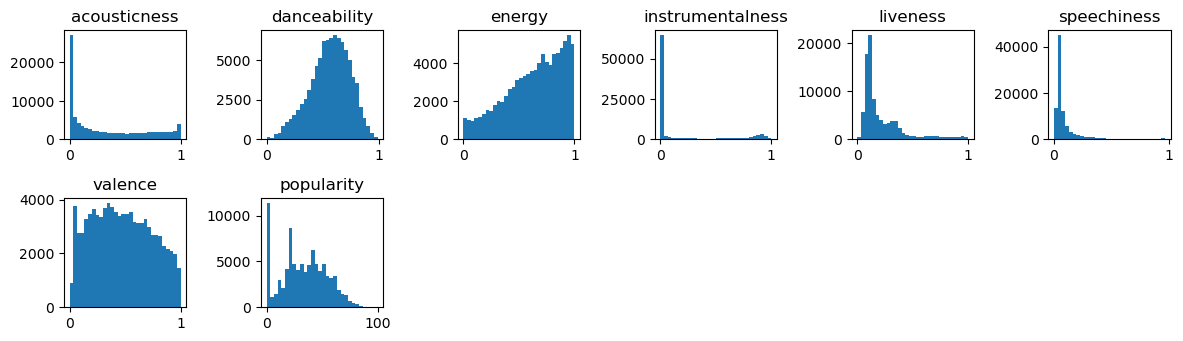

                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.177043 -0.732566          0.096065   
danceability         -0.177043      1.000000  0.143914         -0.194747   
energy               -0.732566      0.143914  1.000000         -0.181037   
instrumentalness      0.096065     -0.194747 -0.181037          1.000000   
liveness             -0.019081     -0.132234  0.188941         -0.087152   
speechiness           0.005121      0.109520  0.141332         -0.099658   
valence              -0.103767      0.492571  0.256313         -0.330759   
popularity           -0.038847      0.064281  0.013728         -0.127465   

                  liveness  speechiness   valence  popularity  
acousticness     -0.019081     0.005121 -0.103767   -0.038847  
danceability     -0.132234     0.109520  0.492571    0.064281  
energy            0.188941     0.141332  0.256313    0.013728  
instrumentalness -0.087152    -0.099658 -0.330759   -0.1274

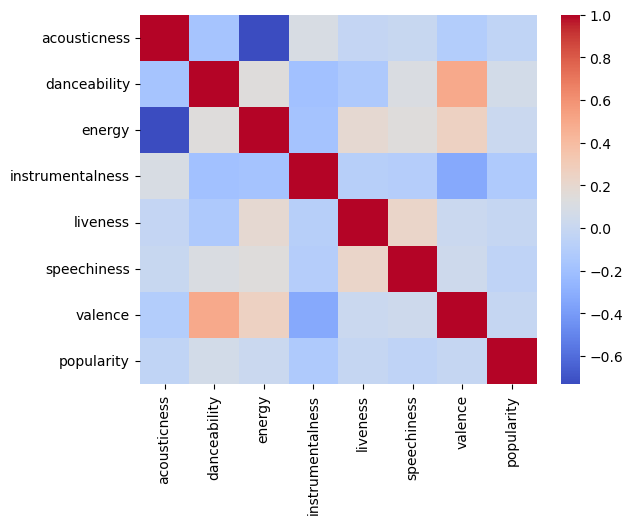

In [26]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
# <Your code here>
fig = plt.figure(figsize=(12,10))

for i, col in enumerate(data.columns):
    ax = fig.add_subplot(6,6,i + 1)
    #ax = axs[int(i/6), int(i%6)]
    ax.hist(data[col], bins=30)
    ax.set_title(col)

    
fig.tight_layout()
plt.show()


# CALCULATE THE CORRELATION MATRIX
# <Your code here>
correlation = data.corr()
print(correlation)

# Decrease font size
#plt.rcParams['font.size'] = 8

# PLOT THE HEATMAP
# <Your code here>

#plt.figure(figsize=(8,7))
heatmap = sns.heatmap(correlation, cmap="coolwarm")
plt.show()




In [27]:


# SEGREGATE FEATURES AND LABELS INTO SEPARATE VARIABLES
# <Your code here>
X = data.loc[:, data.columns != 'popularity']
y = data['popularity']


# SPLIT INTO TRAIN AND TEST USING TRAIN_TEST_SPLIT()
# <Your code here>
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
data

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,popularity
0,0.0322,0.676,0.4610,0.000001,0.3580,0.1430,0.7150,73
1,0.9240,0.420,0.1660,0.000006,0.1010,0.0763,0.2670,55
2,0.2100,0.438,0.3590,0.000000,0.1170,0.0557,0.1200,57
3,0.9050,0.266,0.0596,0.000071,0.1320,0.0363,0.1430,71
4,0.4690,0.618,0.4430,0.000000,0.0829,0.0526,0.1670,82
...,...,...,...,...,...,...,...,...
113995,0.6400,0.172,0.2350,0.928000,0.0863,0.0422,0.0339,21
113996,0.9940,0.174,0.1170,0.976000,0.1050,0.0401,0.0350,22
113997,0.8670,0.629,0.3290,0.000000,0.0839,0.0420,0.7430,22
113998,0.3810,0.587,0.5060,0.000000,0.2700,0.0297,0.4130,41


In [29]:
# INSTANTIATE MINMAXSCALER AND USE IT TO RESCALE X_TRAIN AND X_TEST
# <Your code here>
# scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# You can try to do z-score normalization (look it up!)
# INSTANTIATE A LOGISTICREGRESSION CLASSIFIER WITH DEFAULT PARAMETER VALUES
# <Your code here>
X = X.apply(zscore)
# X_test = X_test.apply(zscore)

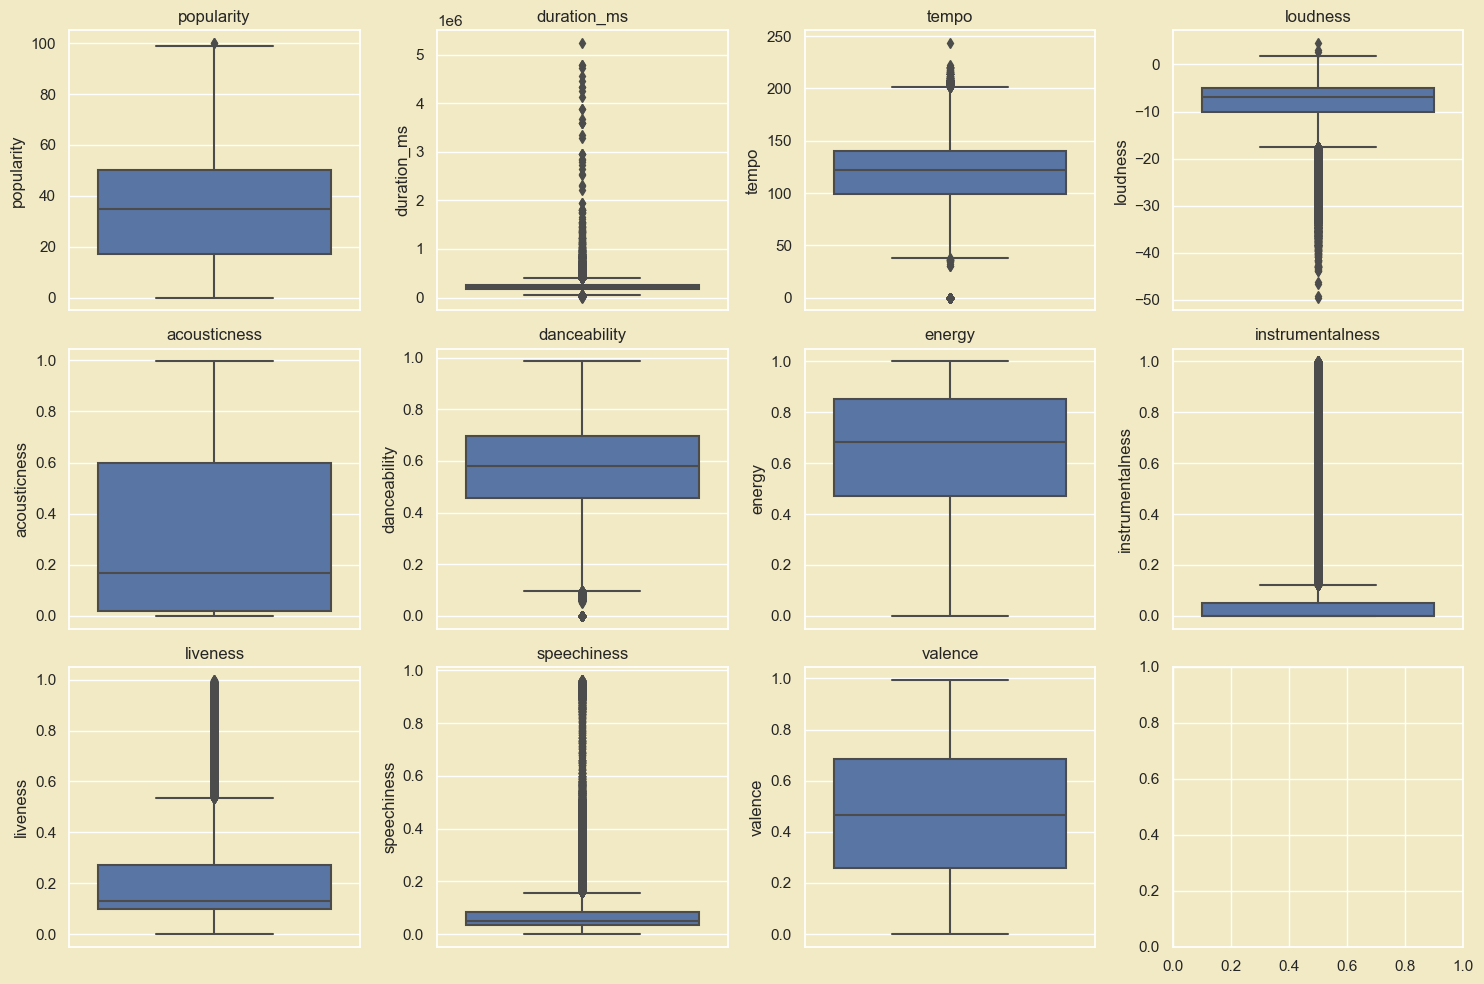

In [30]:
# boxplot for numerical columns
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
columns = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=tracks_df, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
eps = [1, 1.1, 1.2]
min_samples= range(5, 15, 5)

In [ ]:
# for eps in eps:
#     for min_sample in min_samples:
#         dbs = DBSCAN(eps = eps, min_samples=min_sample)
#         dbs.fit(X)
        
#         labels = dbs.labels_
#         n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
         # n_noise_ = list(labels).count(-1)
         # print(f'The parameter used are: eps: {eps}, min_sample: {min_sample}')
         # print("Estimated number of clusters: %d" % n_clusters_)
         # print("Estimated number of noise points: %d" % n_noise_)
    

In [ ]:
len(track_df['track_genre'].unique())

Valence, acousticness, and energy doesn't have outliers. 

In [ ]:
dbs = DBSCAN(eps = 1, min_samples=10)

In [ ]:
dbs.fit(X)

In [ ]:
labels = dbs.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [ ]:
track_df['clusters'] = labels

In [ ]:
silhouette_score(X, track_df['clusters'])

In [ ]:
# Find out the most frequent cluster among the user's favorite songs
X['clusters'] = labels


In [ ]:
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')
ids = [int(id.strip()) for id in ids]

In [ ]:
favorites = track_df[track_df['Unnamed: 0'].isin(ids)]
favorites

In [ ]:
track_df['clusters'] = labels
fav_cluster = track_df.iloc[ids]['clusters'].tolist()
track_df

In [ ]:
track_df[track_df['clusters'] == fav_cluster[0]]

In [ ]:
sum(track_df['clusters'] == 0)

In [ ]:
track_df[track_df['clusters'] == fav_cluster[0]].sort_values('popularity', ascending=False).head()

In [ ]:
ac = AgglomerativeClustering(n_clusters=4)

In [ ]:
ac.fit()